In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [6]:
input_features = df.iloc[:,1:-1]
labels = df.iloc[:,-1]

In [7]:
print(input_features)
print(labels)


     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [8]:
# Convert the data into same scale

from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()

scaled_input_data = standard_scaler.fit_transform(input_features)

In [9]:
scaled_input_data

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_input_data, labels, random_state = 2, test_size = 0.2)

In [11]:
print(X_train[:5])
print(X_test[:5])
print(Y_train[:5])
print(Y_test[:5])

[[-0.98019606  0.89257019 -0.66783025]
 [ 1.02020406 -0.15807423  0.85914229]
 [-0.98019606 -1.01769239 -0.37418169]
 [ 1.02020406  0.98808332  0.59485858]
 [ 1.02020406 -0.92217926  0.56549373]]
[[-0.98019606 -0.82666613  0.38930459]
 [-0.98019606 -1.59077117 -1.5781408 ]
 [ 1.02020406 -0.0625611  -0.49164111]
 [ 1.02020406 -0.82666613  0.15438573]
 [ 1.02020406  1.5611621   0.00756145]]
205    0
354    1
3      0
264    1
194    0
Name: Purchased, dtype: int64
94     0
32     0
225    0
157    0
356    1
Name: Purchased, dtype: int64


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Without using max_depth
clf_without_max_depth = DecisionTreeClassifier()

In [13]:
clf_without_max_depth.fit(X_train, Y_train)

DecisionTreeClassifier()

[Text(0.45738636363636365, 0.96875, 'x[1] <= 0.463\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.26136363636363635, 0.90625, 'x[2] <= 0.58\ngini = 0.265\nsamples = 229\nvalue = [193, 36]'),
 Text(0.18181818181818182, 0.84375, 'x[1] <= -0.11\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.1590909090909091, 0.78125, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.20454545454545456, 0.78125, 'x[2] <= 0.404\ngini = 0.19\nsamples = 66\nvalue = [59, 7]'),
 Text(0.18181818181818182, 0.71875, 'x[2] <= -0.066\ngini = 0.168\nsamples = 65\nvalue = [59, 6]'),
 Text(0.1590909090909091, 0.65625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.20454545454545456, 0.65625, 'x[1] <= 0.367\ngini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.13636363636363635, 0.59375, 'x[2] <= 0.022\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 Text(0.11363636363636363, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1590909090909091, 0.53125, 'x[1] <= 0.272\ng

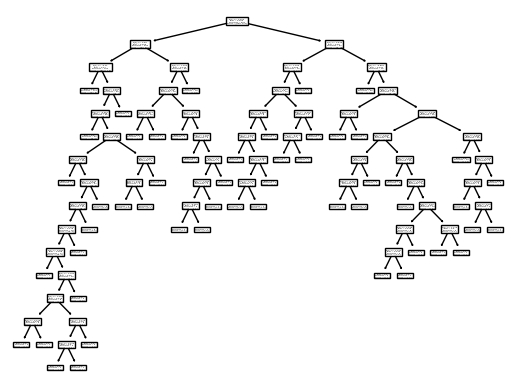

In [14]:
from sklearn.tree import plot_tree

plot_tree(clf_without_max_depth)

In [15]:
# Using max_depth
clf_using_max_depth = DecisionTreeClassifier(max_depth = 3)

clf_using_max_depth.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 0.463\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.25, 0.625, 'x[2] <= 0.58\ngini = 0.265\nsamples = 229\nvalue = [193, 36]'),
 Text(0.125, 0.375, 'x[1] <= -0.11\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.1875, 0.125, 'gini = 0.19\nsamples = 66\nvalue = [59, 7]'),
 Text(0.375, 0.375, 'x[2] <= 1.402\ngini = 0.313\nsamples = 36\nvalue = [7, 29]'),
 Text(0.3125, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.75, 0.625, 'x[1] <= 0.845\ngini = 0.29\nsamples = 91\nvalue = [16, 75]'),
 Text(0.625, 0.375, 'x[2] <= 1.006\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.375, 'x[2] <= -0.829\ngini = 0.231\nsamples = 75\nvalue = [10, 65]'),
 Text(

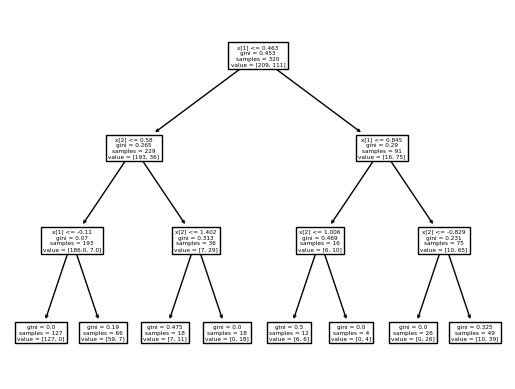

In [16]:
plot_tree(clf_using_max_depth)